# Исследование надежности заемщиков.

# Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
# Поставленные вопросы
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

# Описание данных
children — количество детей в семье  
days_employed — общий трудовой стаж в днях  
dob_years — возраст клиента в годах  
education — уровень образования клиента  
education_id — идентификатор уровня образования  
family_status — семейное положение  
family_status_id — идентификатор семейного положения  
gender — пол клиента  
income_type — тип занятости  
debt — имел ли задолженность по возврату кредитов  
total_income — ежемесячный доход  
purpose — цель получения кредита

## Шаг 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски есть в двух столбцах: общий трудовой стаж в днях и ежемесячный доход

## Шаг 2

### Шаг 2.1 Проверка данных на аномалии и исправления.

In [5]:
df.duplicated().sum()

54

In [6]:
df = df.drop_duplicates().reset_index(drop=True) 

Удаляем явные дубликаты

In [7]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21471.000000,19351.000000,21471.000000,21471.000000,21471.000000,21471.000000,1.935100e+04
mean,0.539565,63046.497661,43.279074,0.817195,0.973685,0.081086,1.674223e+05
std,1.382978,140827.311974,12.574291,0.548508,1.421082,0.272974,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Исходя из таблицы можно сделать вывод, о наличие аномалий: 
- В столбце children есть отрицательные значения "-1" и слишком большое значение "20".
- В столбце days_employed, есть отрицательные и слишком большие значения.
- В столбце dob_years, некоторые значения равны 0.

Отрицательные значения могли возникнуть, если человек поставил дефис"-". Слишком большие значения, скорее всего, возникли из-за человеческого фактора.

In [8]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [9]:
df[df['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2940,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
20958,20,-1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
21272,20,-601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
21337,20,NaN,53,среднее,1,женат / замужем,0,M,компаньон,0,NaN,покупка жилой недвижимости
21351,20,-494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


Обнаруженная аномалия"-1" и "20" в столбце children, хорошо видна при нахождении уникальных значений.  

In [10]:
df['days_employed'] = abs(df['days_employed'])#уберем отрицательные значения с помочью модуля
df['children'] = abs(df['children'])

In [11]:
df.loc[df['children']==20, 'children']=2 #заменим 20 на значение 2
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

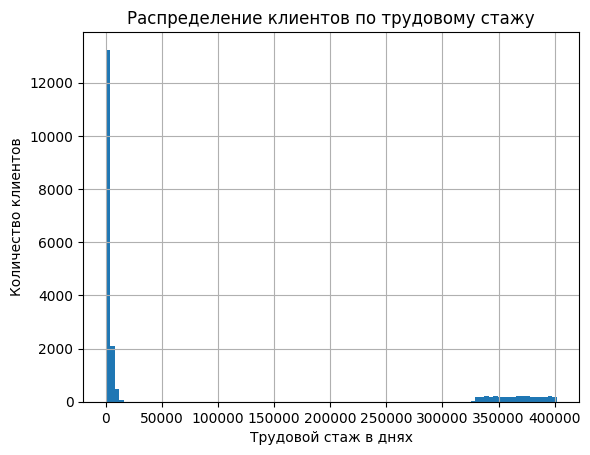

In [12]:
df.plot(y='days_employed', kind='hist',bins=100, grid=True, title='Распределение клиентов по трудовому стажу', legend=False)
plt.xlabel('Трудовой стаж в днях')
plt.ylabel('Количество клиентов')
plt.show()

In [13]:
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

In [14]:
df['days_employed'].value_counts(bins = [0,10000,20000,300000,450000])

(-0.001, 10000.0]       15646
(300000.0, 450000.0]     3445
(10000.0, 20000.0]        260
(20000.0, 300000.0]         0
Name: days_employed, dtype: int64

3445 клиентов имеют стаж больше 800 лет. Заменим данные значения медианой,без учета аномалий.

In [15]:
mediana_days = df[df['days_employed'] < 20000]['days_employed'].median()
mediana_days 

1630.0193809778218

In [16]:
def days_employed_modify(x):
    if x > 20000:
        x = mediana_days
        return x
    else :
        return x

In [17]:
df['days_employed'] = df['days_employed'].apply(days_employed_modify)

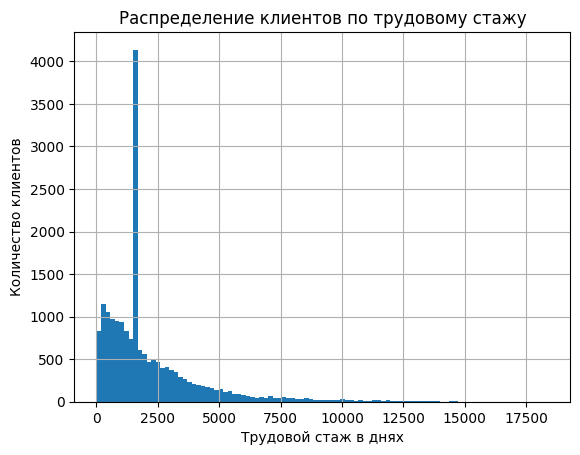

In [18]:
df.plot(y='days_employed', kind='hist',bins=100, grid=True, title='Распределение клиентов по трудовому стажу', legend=False)
plt.xlabel('Трудовой стаж в днях')
plt.ylabel('Количество клиентов')
plt.show()

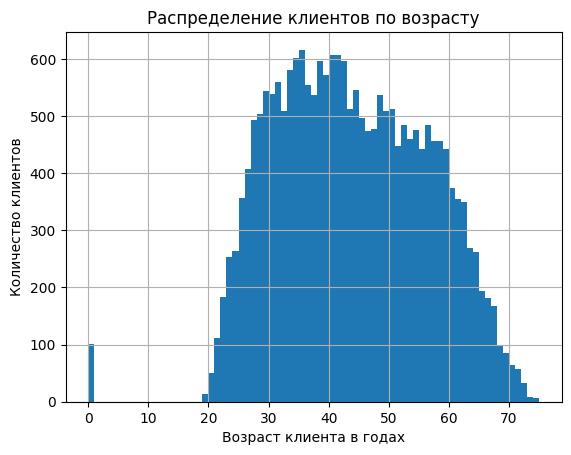

In [19]:
df.plot(y='dob_years', kind='hist', bins=75, grid=True, title='Распределение клиентов по возрасту', legend=False)
plt.xlabel('Возраст клиента в годах')
plt.ylabel('Количество клиентов')
plt.show()

### Шаг 2.2 Заполнение пропусков

In [20]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

Медиана устойчива к выбросам,поэтому находим медиану и заполняем ей пропуски.

### Шаг 2.3. Изменение типов данных.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     21471 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      21471 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [22]:
df['days_employed'] = df['days_employed'].astype('int')

### Шаг 2.4. Удаление дубликатов.

In [23]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Присутствуют дубликаты, из-за разного регистра, необходимо привести к одному регистру.

In [24]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [25]:
df['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [26]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [27]:
df['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [28]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [29]:
df[df['gender']=='XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10690,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


В столбце "gender" замечена 1 ошибка.

In [30]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [31]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

При проверки остальных столбцов, дубликаты из-за разного регистра не обнаружены. В столбце purpose есть близкие по смыслу значения.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Сопоставление значений столбцов

In [32]:
dictionary_education = df[['education','education_id']]
dictionary_education = dictionary_education.drop_duplicates().reset_index(drop=True)
dictionary_education

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [33]:
dictionary_family_status = df[['family_status','family_status_id']]
dictionary_family_status = dictionary_family_status.drop_duplicates().reset_index(drop=True)
dictionary_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями дохода с помощью метода cut():

- 0 - 30000 - 'E'
- 30001 - 50000 - 'D'
- 50001 - 200000 - 'C'
- 200001 - 1000000 - 'B'
- 1000001 и выше - 'A'

In [34]:
df['total_income_category'] = pd.cut(x=df['total_income'], 
                                     bins=[0, 30_000, 50_000, 200_000, 1_000_000, np.inf],
                                     labels=['E', 'D', 'C', 'B', 'A'],
                                     include_lowest=True)

Добавляем столбец с категориями по уровню дохода.

In [35]:
df['total_income_category'].value_counts()

C    16033
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

### Шаг 2.7. Категоризация целей кредита.

In [36]:
def purpose_category(purpose):
    if ('жиль'  in purpose)|('недвиж' in purpose):
        return 'операции с недвижимостью'
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    if 'свадь' in purpose:
        return 'проведение свадьбы'
    if 'образов' in purpose:
        return 'получение образования'

In [37]:
df['purpose_category'] = df['purpose'].apply(purpose_category)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,B,операции с недвижимостью
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,B,операции с недвижимостью
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,C,получение образования
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,C,операции с недвижимостью


In [38]:
df = df.drop(['total_income','purpose'],axis=1) 
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,B,получение образования
4,0,1630,53,среднее,1,гражданский брак,1,F,пенсионер,0,C,проведение свадьбы
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,B,операции с недвижимостью
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,B,операции с недвижимостью
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,C,получение образования
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,C,проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,C,операции с недвижимостью


Убираем столбцы,которые использовали для составление категорий

In [39]:
df['purpose_category'].value_counts()

операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

## Ответы на вопросы.

### Вопрос 1:Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [40]:
children_pivot = df.pivot_table(index='children',columns='debt',values='dob_years',aggfunc='count')
children_pivot_mean = df.groupby(['children']).agg({'debt':'mean'})
children_pivot_mean.head(10)

,debt
children,
0,0.075353
1,0.091639
2,0.094925
3,0.081818
4,0.097561
5,0.000000


In [41]:
len(df[df['children']==5]) #количество клиентов с 5 детьми в данной выборке

9

На основании выше представленной таблицы можно сделать вывод:  
 - Клиенты без детей имеют в 7,5%  просроченных платежей. Это самый низкий процент, вероятно отсутствие детей положительно влияет на вероятность возврата кредита в срок.  
 
По отношению к этой категории: 
- Клиенты с 1 ребенком имеют в 9,2%  просроченных платежей, что на 23% больше, чем клиенты без детей.
- Клиенты с 2 детьми имеют в 9,4%  просроченных платежей, что на 27% больше, чем клиенты без детей.
- Клиенты с 3 детьми имеют в 8,2%  просроченных платежей, что на 9% больше, чем клиенты без детей, и почти на 10% меньше, чем у клиенты с 1 ребенком. (Возможно, связано с поддержкой от государства для многодетных семей.)
- Клиенты с 4 детьми имеют  в 9,8%  просроченных платежей, что на 30% больше, чем клиенты без детей, и на 20% больше, чем у клиенты с 3 детьми.(Поддержка от государства, в этом случае, так же присуствует, но здесь финансовая нагрузка на родителя больше, чем у людей 3 детьми)
- Клиенты  с 5 детьми,в данной таблице, не имели задолженности. В таблице всего 9 клиентов с 5 детьми, нельзя с уверенностью сказать, что с  люди с 5 детьми не имеют просрочек по кредитам.

Наличие детей является дополнительной финансовой нагрузкой на человека,что увеличивает вероятность выплаты кредита с нарушением срока.

### Вопрос 2:Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [42]:
family_status_mean = df.groupby(['family_status_id','family_status']).agg({'debt':'mean'})
family_status_mean.head(10)

,,debt
family_status_id,family_status,
0,женат / замужем,0.075421
1,гражданский брак,0.093202
2,вдовец / вдова,0.065693
3,в разводе,0.071130
4,Не женат / не замужем,0.097509


 - Самый низкий процент просроченных платежей, имеют клиенты в статусе вдовец/вдова - 6,6%.  
 - Разведенные клиенты имеют в 7,1% ,имеют задолженность по возврату в срок, почти на 8% больше, чем в статусе вдовец/вдова.
 - Клиенты в браке имеют  в 7,5%, имеют задолженность по возврату в срок, почти на 14% больше,чем в статусе вдовец/вдова.
 - Клиенты в гражданском браке в 9,3% имеют задолженность по возврату в срок, почти на 41% больше, чем в статусе вдвовец/вдова
 - Клиенты в статусе не женат/не замужем имеют в 9,8% имеют задолженность по возврату в срок, почти на 49% больше, чем в статусе вдовец/вдова.
 - Клиенты, которые были или сейчас состоят в браке, имеют реже задолженность по возврату в срок, чем люди находящиеся в свободном статусе или гражанском браке. 


### Вопрос 3:Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [43]:
total_income_mean = df.groupby(['total_income_category']).agg({'debt':'mean'})
total_income_mean.head(10)

,debt
total_income_category,
E,0.090909
D,0.060000
C,0.084825
B,0.070621
A,0.080000


 - Самый низкий процент задолженностей имеют клиенты с доходом выше 200 000 рублей, 6% просроченных платежей.
 
По отношению к этой категории:
 - Клиенты с доходом до 30 000 рублей имеют 8% просроченных платежей,что 33% больше.
 - Клиенты с доходом от 30 000 до 50 000,имеют 7% просроченных платежей, что на 16% больше.
 - Клиенты с доходом от 50 000 до 200 000, имеют 8,5% просроченных платежей,что почти на 42% больше.
 - Клиенты с доходом от 1 млн, имеют 9,1% просроченных платежей,что почти на 52% больше. Большая зарплата несет за собой большую отвественность и риски, вероятнее всего, из-за этого процент увеличивается.




### Вопрос 4:Как разные цели кредита влияют на его возврат в срок?

In [44]:
purpose_category_mean = df.groupby(['purpose_category']).agg({'debt':'mean'})
purpose_category_mean.head(10)

,debt
purpose_category,
операции с автомобилем,0.093547
операции с недвижимостью,0.072314
получение образования,0.092177
проведение свадьбы,0.079657


 - Самый низкий процент просроченных платежей,по целям кредита имеют операции с недвижимостью - 7,2 % (Связанно залоговым имуществом)
 - Кредит с целью проведение свадьбы имеют почти в 8% задолженность по возврату кредита в срок, это на 10% больше, чем операции с недвижимостью. Процент не самый высокий, возможно в погашении идут подаренные деньги.
 - Операции с получением образования имеют задолженность в 9,2% ,это на 27% больше, чем операции с недвижимостью.
 - Операции с автомобилем имеют задолженность в 9,4%, это на 29% больше, чем операции с неджвижимостью.
 
 Самый низкий процент просроченных платежей имеют цели:операции с недвижимостью и проведение свадьбы

## Общий вывод:

- Самый низкий процент просроченных платежей клиенты без детей. 7,5% просроченных платежей.Отсутствие детей положительно влияет на вероятность возврата кредита в срок.
- Самый низкий процент задолженности по возврату в срок имеют клиенты в статусе вдовец/вдова - 6,6%.Разведенные клиенты имеют в 7,1%.Клиенты, которые были или сейчас состоят в браке, имеют реже задолженность по возврату в срок, чем люди находящиеся в свободном статусе или гражанском браке.
- Самый низкий процент просроченных платежей имеют клиенты с доходом выше 200 000 рублей, 6% просроченных платежей
- Самый низкий процент просроченных платежей имеют цели:операции с недвижимостью  7,2 %  и проведение свадьбы 8%.
- Семейное положение, наличие детей и уровень дохода влияют на вероятность задолженности по возврату кредита в срок.Хороший вариант заемщика, это человек, который находился или находится в браке, не имеет детей и его уровень дохода больше 200 000 рублей.
- Цель кредита так же влияет на вероятность возврата в срок, риски банк закладывает в процентную ставку кредита. Операции с недвижимостью приносят меньше прибыли, чем автомобильные кредиты, за то вероятность вернуть деньги в срок больше. Здесь необходимо диверсифицировать по цели кредита, где меньше вероятность просрочки, выдавать чаще.А где выше риск просрочки выдавать реже,но заработок с них больше.